<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 190.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 188.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 182.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 167.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 182.3 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


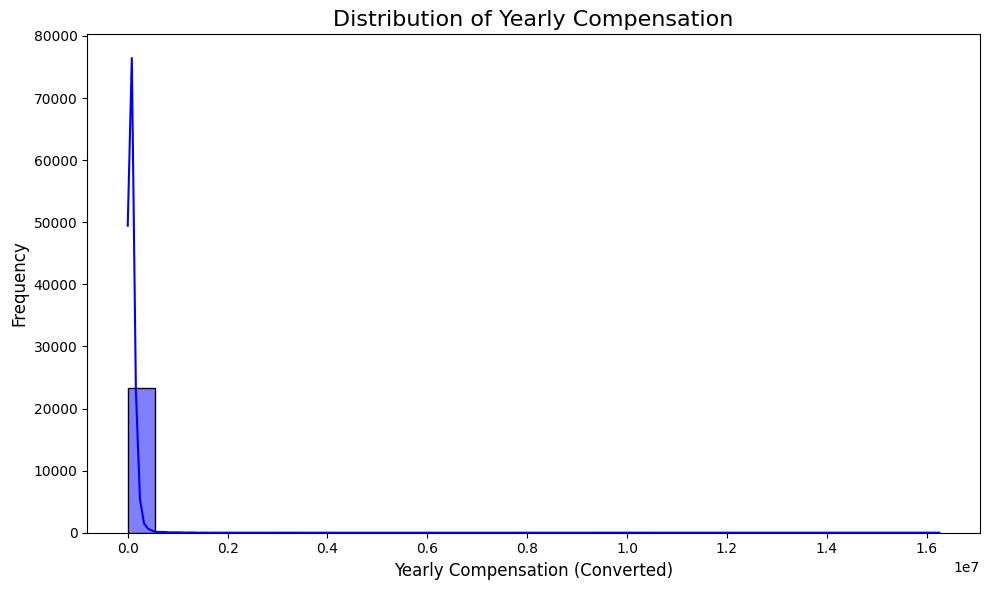

In [3]:
## Write your code here

df_cleaned = df['ConvertedCompYearly'].dropna()

# Plotting the distribution and histogram
plt.figure(figsize=(10, 6))

# Using seaborn for a combined histogram and KDE (Kernel Density Estimate) plot
sns.histplot(df_cleaned, kde=True, color='blue', bins=30)

# Adding titles and labels
plt.title("Distribution of Yearly Compensation", fontsize=16)
plt.xlabel("Yearly Compensation (Converted)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
## Write your code here

full_time_employees = df[df['Employment'] == "Employed, full-time"]

# Calculate the median of the "ConvertedCompYearly" column
median_compensation = full_time_employees['ConvertedCompYearly'].median()

# Print the result
print(f"The median yearly compensation for full-time employees is: {median_compensation}")

The median yearly compensation for full-time employees is: 69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



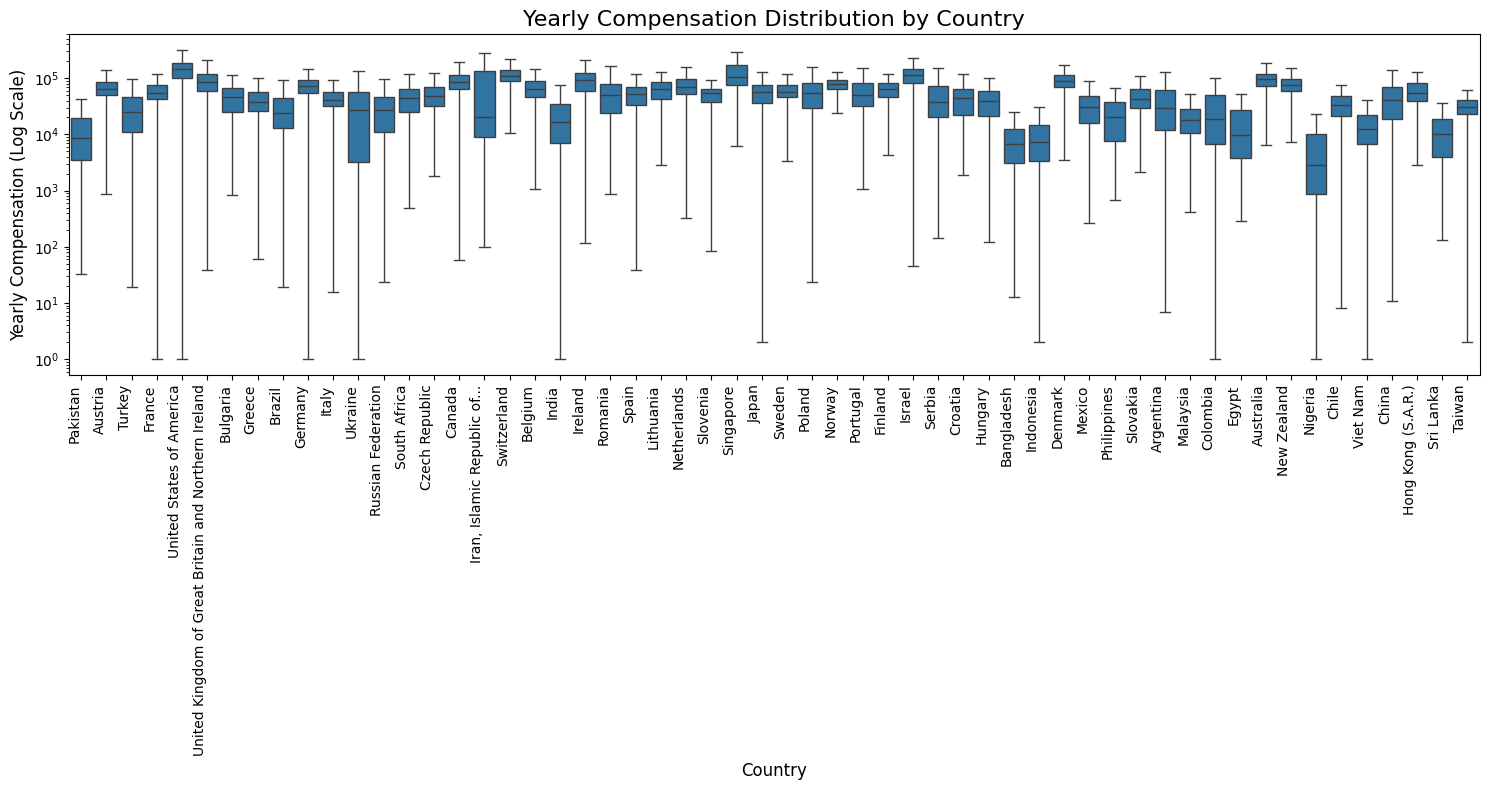

In [6]:
## Write your code here

df_cleaned = df[['Country', 'ConvertedCompYearly']].dropna()

# Filter for countries with sufficient data (optional, to declutter the plot)
min_responses = 50  # Adjust this threshold as needed
countries_with_enough_data = df_cleaned['Country'].value_counts()[df_cleaned['Country'].value_counts() > min_responses].index
filtered_data = df_cleaned[df_cleaned['Country'].isin(countries_with_enough_data)]

# Plotting the box plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=filtered_data, x='Country', y='ConvertedCompYearly', showfliers=False)
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate country names for better readability
plt.yscale('log')  # Use a logarithmic scale for better visualization of skewed data

# Add titles and labels
plt.title("Yearly Compensation Distribution by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Yearly Compensation (Log Scale)", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [7]:
## Write your code here

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                     # Interquartile range
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to exclude outliers
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Apply the function to the 'ConvertedCompYearly' column
refined_df = remove_outliers_iqr(df, 'ConvertedCompYearly')

# Print the refined DataFrame size and preview
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Refined dataset size after removing outliers: {refined_df.shape[0]} rows")
refined_df.head()

Original dataset size: 65437 rows
Refined dataset size after removing outliers: 22457 rows


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.406993       -0.059643
WorkExp                         0.406993  1.000000       -0.032388
JobSatPoints_1                 -0.059643 -0.032388        1.000000


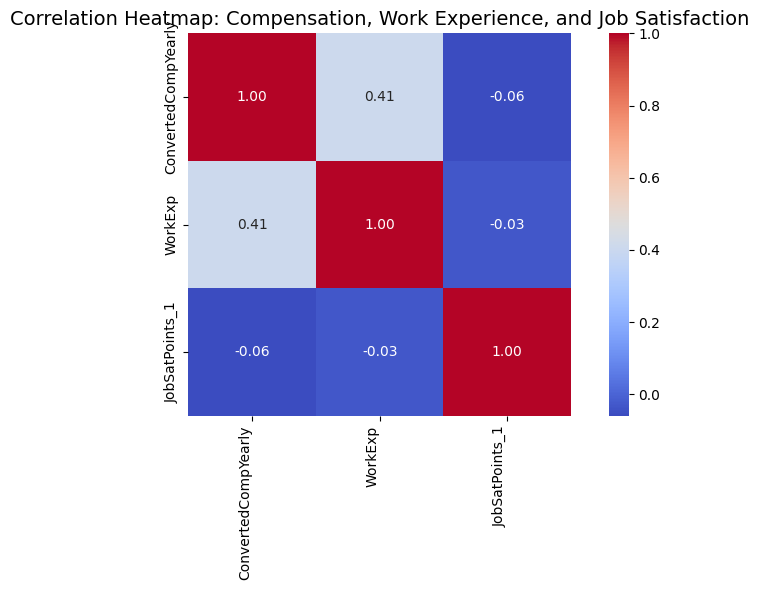

In [9]:
## Write your code here

relevant_columns = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
correlation_data = refined_df[relevant_columns].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Print the correlation matrix for reference
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Add titles and labels
plt.title("Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction", fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


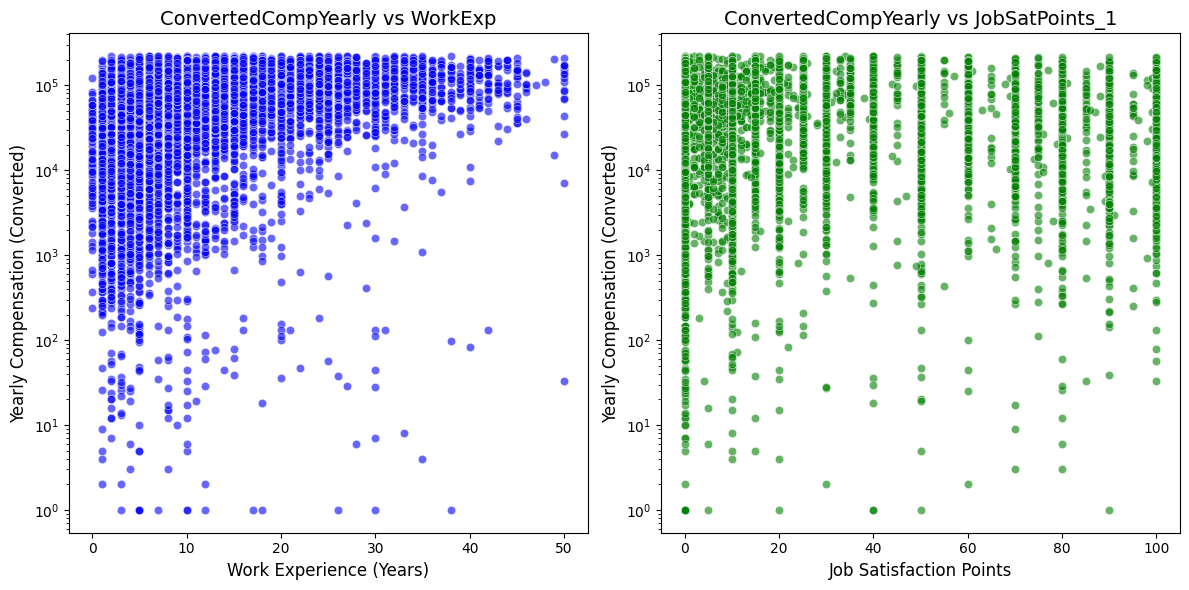

In [10]:
## Write your code here

scatter_data = refined_df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

# Plot 1: ConvertedCompYearly vs WorkExp
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Create the first subplot
sns.scatterplot(data=scatter_data, x='WorkExp', y='ConvertedCompYearly', color='blue', alpha=0.6)
plt.title("ConvertedCompYearly vs WorkExp", fontsize=14)
plt.xlabel("Work Experience (Years)", fontsize=12)
plt.ylabel("Yearly Compensation (Converted)", fontsize=12)
plt.yscale('log')  # Use log scale for better visualization of compensation distribution

# Plot 2: ConvertedCompYearly vs JobSatPoints_1
plt.subplot(1, 2, 2)  # Create the second subplot
sns.scatterplot(data=scatter_data, x='JobSatPoints_1', y='ConvertedCompYearly', color='green', alpha=0.6)
plt.title("ConvertedCompYearly vs JobSatPoints_1", fontsize=14)
plt.xlabel("Job Satisfaction Points", fontsize=12)
plt.ylabel("Yearly Compensation (Converted)", fontsize=12)
plt.yscale('log')  # Use log scale for better visualization

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
